<h1><p><b> <span style="color: green"> PART 1 </b></p><h1>

<p><b> <span style="color: orange"> Tasks: </b></p>
Download the dataset: <br>

* articles1.csv - 50,000 news articles (Articles 1-50,000)
* articles2.csv - 49,999 news articles (Articles 50,001-100,00)
* articles3.csv - Articles 100,001+. 

Your task:<br>
* Use LDA to present topic-word distributions as well as document-topic distributions. You may use Gensim implementation for simplicity.
* Use PyLDAvis to visualize the topics in the topic model.


<p><b> <span style="color: orange"> Step 1: Install and import relevant libraries</b></p>

In [5]:
# Install and import relevant libraries
import warnings
warnings.filterwarnings("ignore") # avoid showing warning, comment out instead.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import seaborn as sns
import re
import os, types
import pickle

# from sklearn.feature_extraction.text import CountVectorizer # transform text into vector
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, f1_score, ConfusionMatrixDisplay
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
# from sklearn.linear_model import SGDClassifier, LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import KFold

# from collections import defaultdict
# import tabulate

# from nltk.stem import WordNetLemmatizer
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# nltk.download("punkt")
# nltk.download('wordnet')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpdca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dpdca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpdca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<p><b> <span style="color: orange"> Step 2: Load the data and convert data to DataFrame</b></p>

In [12]:
# Directory to corpus folder
folder_path = "D:/Seneca Study/2023-2024/BDM550 - Text Mining/BDM550 project/corpus/corpus/"
# Load each CSV file inside the folder path
articles_1 = pd.read_csv(folder_path + 'articles1.csv')
articles_2 = pd.read_csv(folder_path + 'articles2.csv')
articles_3 = pd.read_csv(folder_path + 'articles3.csv')

# Concatenate three dataframes (combine rows)
all_articles = pd.concat([articles_1, articles_2, articles_3], ignore_index=True)
df = all_articles.copy() 

In [165]:
df = all_articles.copy() 

In [13]:
df.sample(5) # print 5 random rows.
# df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
92741,96200,142199,Why Yankees replacing Adam Warren is so crucia...,New York Post,Joel Sherman,2016-02-26,2016.0,2.0,http://nypost.com/2016/02/26/why-yankees-repla...,TAMPA — Start making your list of most valu...
56755,60071,82210,Finding Wisdom in the Letters of Aging Writers,Atlantic,Robert Fay,2016-12-11,2016.0,12.0,NaN,"In 1975, a Elizabeth Bishop wrote to her ..."
123428,126891,189666,Okta hires Goldman Sachs to lead IPO or sale: ...,Reuters,Liana B. Baker and Lauren Hirsch,2016-06-22,2016.0,6.0,http://www.reuters.com/article/us-okta-m-a-ipo...,Okta’s exploration of both an IPO and a sale u...
6246,6246,24449,Kanye West Calls Out Beyoncé and Praises Trump...,New York Times,Joe Coscarelli,2016-11-21,2016.0,11.0,NaN,Kanye West likened himself to Donald J. Trump ...
41842,44130,63088,Stop expecting firefighters to save your homes,CNN,NaN,2015-05-27,2015.0,5.0,NaN,(CNN) The Forest Service is already predictin...


<p><b> <span style="color: orange"> Step 3: Process the data</b></p>

In [174]:
# Remove the 'Unnamed: 0' column since it is redundant
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df.sample(5)

,id,title,publication,author,date,year,month,url,content
119969,184080,Exclusive: Lockheed nears $37 billion-plus dea...,Reuters,Mike Stone,2017-06-19,2017.0,6.0,http://www.reuters.com/article/us-airshow-pari...,This would be the biggest deal yet for the ste...
42876,64542,Eid celebrations around the world,CNN,NaN,2015-07-17,2015.0,7.0,NaN,"For the world’s Muslims, the festival of Eid ..."
57585,83257,Lynch confirms career Justice Department attor...,Fox News,Catherine Herridge,2016-02-24,2016.0,2.0,https://web.archive.org/web/20160225033312/htt...,Attorney General Loretta Lynch confirmed to C...
38205,58319,"Florida, East Coast prepares for Hurricane Mat...",CNN,Catherine E. Shoichet,2016-10-04,2016.0,10.0,NaN,(CNN) Gas lines in Florida. Traffic jams on S...
40689,61537,IRS scam costing victims $15 million,CNN,<strong>Sara Ganim</strong>,2015-03-13,2015.0,3.0,NaN,(CNN) They are very convincing when they call...


In [17]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Cleaning text function
def text_clean(text, method, rm_stop):
    text = re.sub(r"\n", "", text)   # Remove line breaks
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+","", text)   # Remove digits and currencies
    text = re.sub(r'[\$\d+\d+\$]', "", text)
    text = re.sub(r'\d+[\.\/-]\d+[\.\/-]\d+', '', text)   # Remove dates
    text = re.sub(r'[^\x00-\x7f]', r' ', text)   # Remove non-ascii
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   # Remove hyperlinks

    # Remove stop words
    if rm_stop == True:
        filtered_tokens = [word for word in word_tokenize(text) if not word in set(stopwords.words('english'))]
        text = " ".join(filtered_tokens)

    # Lemmatization: typically preferred over stemming
    if method == 'L':
        lemmer = WordNetLemmatizer()
        lemm_tokens = [lemmer.lemmatize(word) for word in word_tokenize(text)]
        return " ".join(lemm_tokens)

    # Stemming
    if method == 'S':
        porter = PorterStemmer()
        stem_tokens = [porter.stem(word) for word in word_tokenize(text)]
        return " ".join(stem_tokens)

    return text

In [18]:
# Clean df['content']
df['content'] = df['content'].apply(lambda x: text_clean(x, method='L', rm_stop=True))

In [19]:
df.sample(5)

,id,title,publication,author,date,year,month,url,content
74419,118375,<i>Breitbart</i> Editor: ‘Corey Lewandowski Is...,National Review,Tom S. Elliott,2016-03-11,2016.0,3.0,http://www.nationalreview.com/article/432700/b...,breitbart ben shapiro calling donald trump fir...
111860,170493,Illinois Man Is Arrested After Burning U.S. Fl...,NPR,Bill Chappell,2016-07-05,2016.0,7.0,http://www.npr.org/sections/thetwo-way/2016/07...,one day bryton mellott photo burning american ...
124650,191810,"For AT&T, Time Warner was always on the menu",Reuters,Liana B. Baker,2016-10-23,2016.0,10.0,http://www.reuters.com/article/us-timewarner-m...,time warner inc jeff bewkes welcomed att inc r...
15308,34045,Jerry Jones Says He Has ‘More to Offer’ Now Th...,Breitbart,Dylan Gwinn,2017-04-25,2017.0,4.0,NaN,jerry jones like fine wine get better age ask ...
123230,189343,Podcast: The AC-130 gunship and a tragedy in A...,Reuters,Jason Fields,2016-06-03,2016.0,6.0,http://www.reuters.com/article/us-ac-130-podca...,united state keep old plane arsenal serf purpo...


In [20]:
# Use the pickle package to save and load preprocessed text data
import pickle
cleaned_content = df['content']
# cleaned_content = df['content'].apply(lambda x: text_clean(x, method='L', rm_stop=True))

# Save cleaned content using pickle
with open('cleaned_content.pkl', 'wb') as f:
    pickle.dump(cleaned_content, f)



In [21]:
# Load cleaned content from the pickle file
import pickle
with open('cleaned_content.pkl', 'rb') as f:
    cleaned_content = pickle.load(f)

In [22]:
cleaned_content.sample(5)

50377    middle paleolithic roughly year ago neandertha...
64115    one day republican donald trump campaign manag...
12956    facebook criticized new german hate speech law...
23321    republican leader praising presumptive republi...
42827    cnn every year studio network publisher set wo...
Name: content, dtype: object

In [ ]:
# import pickle

# title_dict = {}
# for index, row in df.iterrows():
#     cleaned_content = text_clean(row['content'], method='L', rm_stop=True)
#     title_dict[row['title']] = cleaned_content

# # Save the title dictionary using pickle
# with open('title_dictionary.pkl', 'wb') as f:
#     pickle.dump(title_dict, f)

In [ ]:
# # Load the title dictionary from the saved file
# with open('title_dictionary.pkl', 'rb') as f:
#     loaded_title_dict = pickle.load(f)

In [ ]:
# print(loaded_title_dict)

### Make a word cloud to highlight popular words

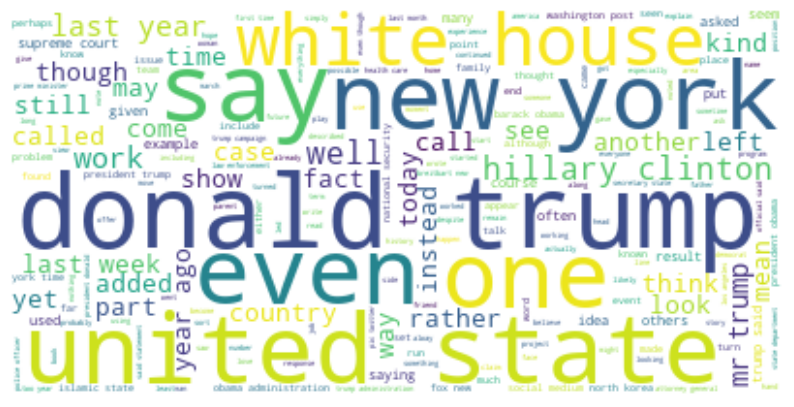

In [24]:
# Make a word cloud to highlight popular words
from wordcloud import WordCloud

# Join the different processed contents together
long_string = ' '.join(list(cleaned_content))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<p><b> <span style="color: orange"> Step 4: Build LDA Model</b></p>

In [25]:
# text_data = df['content'].tolist()
import pickle
text_data = cleaned_content .tolist()
# Save list of text content using pickle
with open('text_data.pkl', 'wb') as f:
    pickle.dump(text_data, f)

In [26]:
# Load cleaned content from the pickle file
import pickle
with open('text_data.pkl', 'rb') as f:
    text_data = pickle.load(f)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorize text data
tfidf = TfidfVectorizer()
vectorized_data = tfidf.fit_transform(text_data)

In [241]:
# Save vectorized_data using pickle
import pickle
with open('vectorized_data.pkl', 'wb') as f:
    pickle.dump(vectorized_data, f)


In [242]:
# Open vectorized_data using pickle
import pickle
with open('vectorized_data.pkl', 'rb') as f:
    vectorized_data = pickle.load(f)

In [29]:
import gensim
from gensim import corpora, models

# Convert the TF-IDF matrix to a Gensim-compatible format
corpus = gensim.matutils.Sparse2Corpus(vectorized_data, documents_columns=False)

In [30]:
# Create a dictionary mapping words to IDs
id2word = {idx: word for word, idx in tfidf.vocabulary_.items()}

In [31]:
# Build the LDA model
num_topics = 20  # create a topic model to cluster news articles into 20 topics.
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=id2word, passes=10, random_state=42)

In [32]:
import pickle
with open('lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)


In [33]:
import pickle
with open('lda_model.pkl', 'rb') as f:
    lda_model = pickle.load(f)

<p><b> <span style="color: orange"> Step 5: Generate Topic-Word Distributions</b></p>

In [34]:
# Extract and save topic-word distributions
topic_word_distributions = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

In [266]:
print(topic_word_distributions)

[(0, [('ailes', 0.0089088185), ('cosby', 0.0076343603), ('wallace', 0.0041915854), ('constand', 0.0026272614), ('megyn', 0.0013168699), ('gretchen', 0.0011748666), ('mcmonagle', 0.00077080505), ('nintendo', 0.00076590583), ('console', 0.0006116249), ('rupert', 0.00056852505)]), (1, [('rep', 0.004848757), ('song', 0.0040539885), ('editing', 0.004023749), ('npr', 0.0036532702), ('music', 0.0035430412), ('vox', 0.0031771706), ('album', 0.00307828), ('amazon', 0.0029421595), ('mom', 0.0028421732), ('parenthood', 0.0022396324)]), (2, [('uk', 0.003996532), ('lgbt', 0.003891049), ('touchdown', 0.0032553535), ('rosenstein', 0.002975141), ('batman', 0.0020929084), ('superhero', 0.001971052), ('softbank', 0.0019517523), ('meyer', 0.0019269467), ('charger', 0.0017824563), ('hb', 0.0017563485)]), (3, [('cia', 0.012609744), ('nsa', 0.004075196), ('egyptair', 0.0009367543), ('machar', 0.0008473732), ('kiir', 0.0007301282), ('juba', 0.00053806044), ('lauer', 0.000365701), ('sharpton', 0.0003337618), 

In [35]:
# Save topic-word distributions to a text file
with open('topic_word_distributions.txt', 'w') as file:
    for topic_id, topic in topic_word_distributions:
        file.write(f"Topic {topic_id}:\n")
        for word, prob in topic:
            file.write(f"{word}: {prob}\n")
        file.write("\n")

In [36]:
# Generate document-topic distributions
doc_topic_distributions = []
for doc in corpus:
    doc_topics = lda_model.get_document_topics(doc)
    doc_topic_distributions.append(doc_topics)

In [ ]:
doc_topic_distributions

[[(1, 0.040162005), (15, 0.89162815)],
 [(1, 0.038050238), (15, 0.880929), (16, 0.023553867)],
 [(1, 0.11208068), (15, 0.8126894)],
 [(1, 0.087583005), (12, 0.03495297), (15, 0.8351092)],
 [(6, 0.36081493), (15, 0.54357713)],
 [(12, 0.057440966), (15, 0.79084885)],
 [(15, 0.889527)],
 [(1, 0.050669026), (12, 0.047400054), (15, 0.8337639)],
 [(1, 0.1020416), (2, 0.06913284), (15, 0.7436381)],
 [(15, 0.8955799)],
 [(12, 0.031097928), (15, 0.90651274)],
 [(15, 0.9149778)],
 [(1, 0.07706426), (15, 0.85586876)],
 [(1, 0.025738278), (15, 0.8769692)],
 [(1, 0.07821305), (15, 0.8424114)],
 [(1, 0.14120291), (12, 0.02924356), (15, 0.7644723)],
 [(12, 0.067993246), (15, 0.85877204)],
 [(12, 0.092581645), (15, 0.83199275)],
 [(12, 0.26601335), (15, 0.66043264)],
 [(1, 0.09413518), (15, 0.7961558)],
 [(1, 0.10917363), (2, 0.06367008), (9, 0.021396242), (15, 0.73520696)],
 [(1, 0.097704925), (15, 0.8140949)],
 [(6, 0.035028066), (12, 0.12129656), (15, 0.7768287)],
 [(1, 0.22938254), (15, 0.7120898)

In [196]:
import pickle
# Save doc_topic_distributions using pickle
with open('doc_topic_distributions.pkl', 'wb') as f:
    pickle.dump(doc_topic_distributions, f)


In [197]:
import pickle
# Open doc_topic_distributions using pickle
with open('doc_topic_distributions.pkl', 'rb') as f:
    doc_topic_distributions = pickle.load(f)

In [37]:
# Save document-topic distributions to a file
with open('doc_topic_distributions.txt', 'w') as file:
    for doc_id, dist in enumerate(doc_topic_distributions):
        file.write(f"Document {doc_id}:\n")
        for topic_id, prob in dist:
            file.write(f"Topic {topic_id}: {prob}\n")
        file.write("\n")

In [268]:
# Print the keywords in the 20 topics and their probabilities.
topics_data = []
for topic_id, topic_words in topic_word_distributions:
    # Extract top words and probabilities for the current topic
    words = [word for word, _ in topic_words]
    probabilities = [prob for _, prob in topic_words]
    
    # Create a dictionary for each topic with its details
    topic_details = {
        'Topic': topic_id,
        'Top_Words': ' '.join(words),
        'Probabilities': ' '.join(map(str, probabilities))
    }
    
    # Append topic details to the topics_data list
    topics_data.append(topic_details)

# Create a DataFrame from topics_data
topics_df = pd.DataFrame(topics_data)

topics_df

,Topic,Top_Words,Probabilities
0,0,ailes cosby wallace constand megyn gretchen mc...,0.0089088185 0.0076343603 0.0041915854 0.00262...
1,1,rep song editing npr music vox album amazon mo...,0.004848757 0.0040539885 0.004023749 0.0036532...
2,2,uk lgbt touchdown rosenstein batman superhero ...,0.003996532 0.003891049 0.0032553535 0.0029751...
3,3,cia nsa egyptair machar kiir juba lauer sharpt...,0.012609744 0.004075196 0.0009367543 0.0008473...
4,4,mccrory pok mon chapman kardashian lazar tomas...,0.006353005 0.0032847107 0.0022772565 0.001371...
5,5,mcdonnell autopilot pepsi mckesson pugh deray ...,0.0025273 0.0012514552 0.00075741694 0.0006802...
6,6,korea north nuclear missile korean castro cuba...,0.017126443 0.010922246 0.009790388 0.00909275...
7,7,bundy deadpool trooper scully johansson vetran...,0.0036558497 0.0006990522 0.0006133434 0.00040...
8,8,opioid taliban opioids belgian heroin painkill...,0.0069120578 0.0051245843 0.004269149 0.003618...
9,9,boeing castile ellison buffett gawker berkshir...,0.007933004 0.005482102 0.0048063872 0.0037187...


In [38]:
from pprint import pprint
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"ailes" + 0.008*"cosby" + 0.004*"wallace" + 0.003*"constand" + '
  '0.001*"megyn" + 0.001*"gretchen" + 0.001*"mcmonagle" + 0.001*"nintendo" + '
  '0.001*"console" + 0.001*"rupert"'),
 (1,
  '0.005*"rep" + 0.004*"song" + 0.004*"editing" + 0.004*"npr" + 0.004*"music" '
  '+ 0.003*"vox" + 0.003*"album" + 0.003*"amazon" + 0.003*"mom" + '
  '0.002*"parenthood"'),
 (2,
  '0.004*"uk" + 0.004*"lgbt" + 0.003*"touchdown" + 0.003*"rosenstein" + '
  '0.002*"batman" + 0.002*"superhero" + 0.002*"softbank" + 0.002*"meyer" + '
  '0.002*"charger" + 0.002*"hb"'),
 (3,
  '0.013*"cia" + 0.004*"nsa" + 0.001*"egyptair" + 0.001*"machar" + '
  '0.001*"kiir" + 0.001*"juba" + 0.000*"lauer" + 0.000*"sharpton" + '
  '0.000*"riek" + 0.000*"salva"'),
 (4,
  '0.006*"mccrory" + 0.003*"pok" + 0.002*"mon" + 0.001*"chapman" + '
  '0.001*"kardashian" + 0.000*"lazar" + 0.000*"tomasz" + 0.000*"niantic" + '
  '0.000*"gyoen" + 0.000*"shinjuku"'),
 (5,
  '0.003*"mcdonnell" + 0.001*"autopilot" + 0.001*"pepsi" + 0

C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qbz5n2kfra8p0\Lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.1776.0_x64__qb

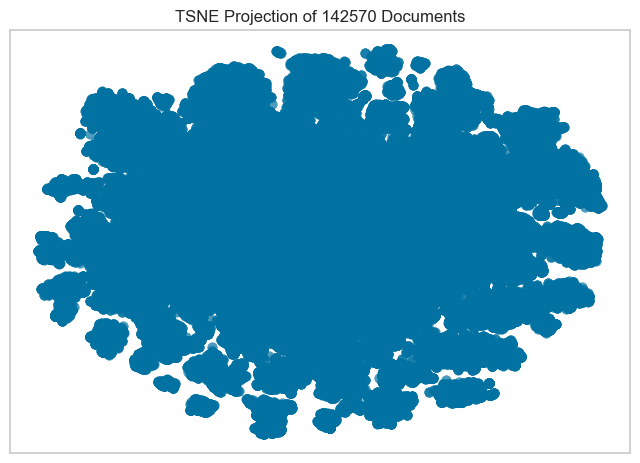

<Axes: title={'center': 'TSNE Projection of 142570 Documents'}>

In [243]:
# t-SNE - Clustering Visualization
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(vectorized_data)
tsne.poof()

C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\yellowbrick\base.py:258: DeprecationWarning: this method is deprecated, please use show() instead
  warnings.warn(


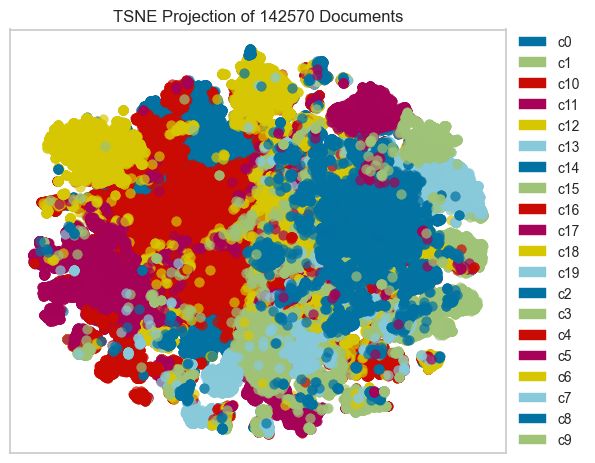

<Axes: title={'center': 'TSNE Projection of 142570 Documents'}>

In [250]:
# t-SNE visualization after k-means clustering
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=20)
clusters.fit(vectorized_data)
tsne = TSNEVisualizer()
tsne.fit(vectorized_data, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()

<p><b> <span style="color: orange"> Step 6: Visualize the topics</b></p>

In [43]:
# Use PyLDAvis for visualization
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

In [42]:
from gensim.corpora import Dictionary

# Convert id2word to Gensim Dictionary format
gensim_dict = Dictionary.from_corpus(corpus, id2word=id2word)
# Prepare the data for visualization
vis_data = gensimvis.prepare(lda_model, corpus, gensim_dict)

In [218]:
import pickle
# Save gensim dictionary using pickle
with open('gensim_dict.pkl', 'wb') as f:
    pickle.dump(gensim_dict, f)


In [219]:
import pickle
# Open gensim dictionary using pickle
with open('gensim_dict.pkl', 'rb') as f:
    gensim_dict = pickle.load(f)

In [44]:
# Visualize the topics
pyLDAvis.display(vis_data)

<h1><p><b> <span style="color: green"> PART 2 </b></p><h1>

<p><b> <span style="color: orange"> 1. What is the most popular topic? Draw a bar chart to visualize the topic distribution in documents. </b></p>

In [116]:
dominant_topics = []
topic_percentages = []

for doc_topics in doc_topic_distributions:
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]
    dominant_topics.append(dominant_topic)
    
    # Append the topic percentage
    for topic, percentage in doc_topics:
        if topic == dominant_topic:
            topic_percentages.append(percentage)
            break



In [114]:
print(dominant_topics)

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

In [283]:
# Checkc how many document that topic 0 is the dominant topic:
count = 0
l = []
for i in range(len(dominant_topics)):
    if dominant_topics[i] == 12:
        l.append(i)
        count +=1
print(l)
print(count)

[23112, 25308, 26873, 28405, 33076, 42945, 45232, 45290, 46814, 47012, 47742, 57659, 60978, 61477, 64111, 82539, 88527, 88924, 114645]
19


In [284]:
#  index of the first occurrence of topic 6 within the dominant_topics 
#print(dominant_topics.index(6))

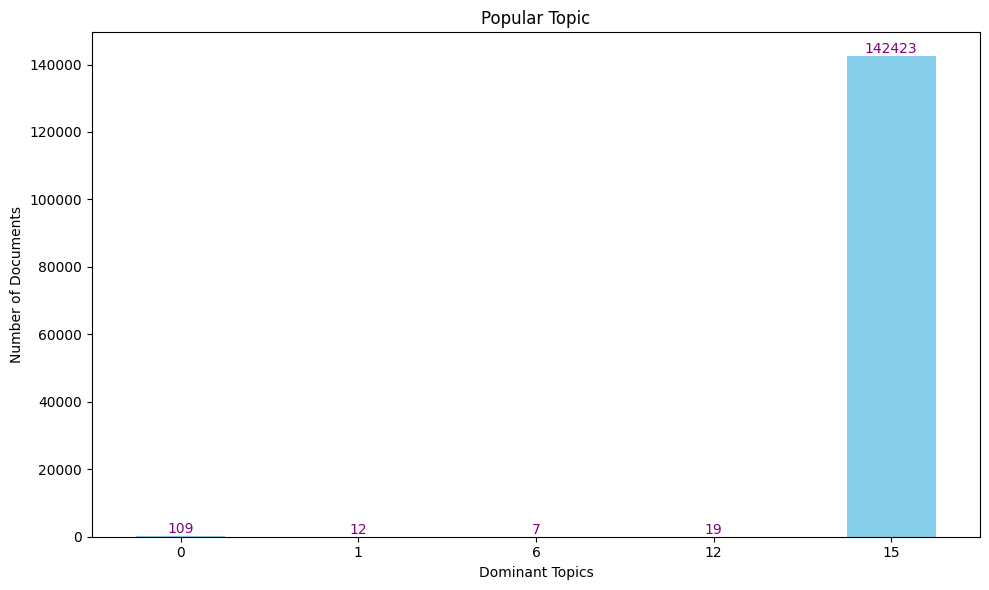

In [155]:
df_dominant_topics = pd.DataFrame({'Dominant_Topic': dominant_topics})
topic_counts = df_dominant_topics['Dominant_Topic'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Topics')
plt.ylabel('Number of Documents')
plt.title('Popular Topic')
plt.xticks(rotation=0)
for i, count in enumerate(topic_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom',color='purple')
plt.tight_layout()
plt.show()

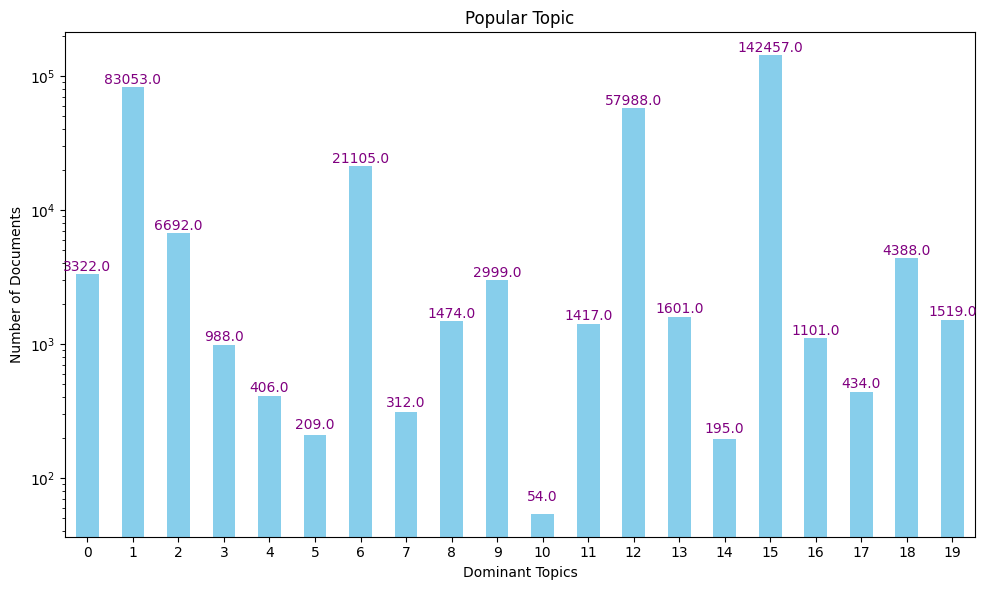

In [237]:
# Plotting the Popular Topic bar chart with logarithmic scale for y-axis
topic_counts2 = pd.Series(topic_counts)

plt.figure(figsize=(10, 6))
topic_counts2.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Topics')
plt.ylabel('Number of Documents')
plt.title('Popular Topic')
plt.xticks(rotation=0)
plt.yscale('log')  # Set y-axis scale to logarithmic
for i, count in enumerate(topic_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', color='purple')
plt.tight_layout()
plt.show()

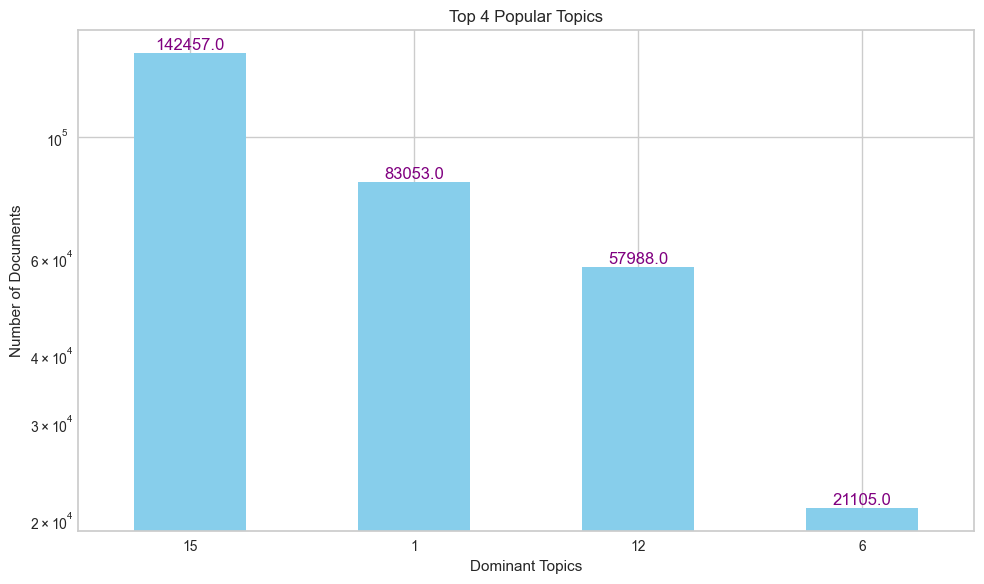

In [286]:
# Top 4 most frequent topics
# topic_counts2 = pd.Series(topic_counts)
top_4_topics = topic_counts2.nlargest(4)

plt.figure(figsize=(10, 6))
top_4_topics.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Topics')
plt.ylabel('Number of Documents')
plt.title('Top 4 Popular Topics')
plt.xticks(rotation=0)
plt.yscale('log')  # Set y-axis scale to logarithmic
for i, count in enumerate(top_4_topics):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', color='purple')
plt.tight_layout()
plt.show()

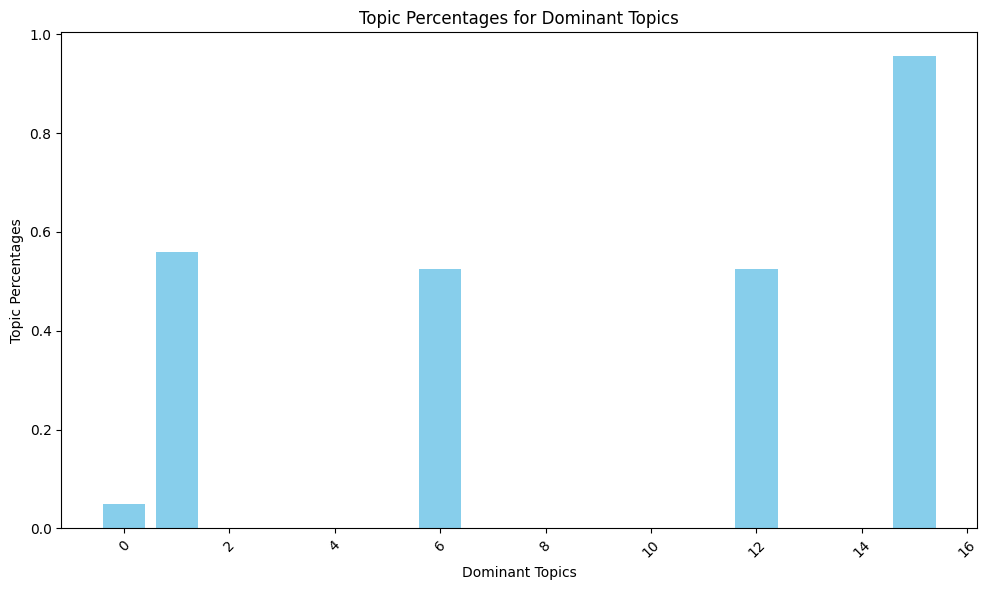

In [139]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart
ax.bar(dominant_topics, topic_percentages, color='skyblue')

# Labeling and titling the chart
ax.set_xlabel('Dominant Topics')
ax.set_ylabel('Topic Percentages')
ax.set_title('Topic Percentages for Dominant Topics')
ax.legend(loc='best')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [125]:
top_4_dominant_topics = []
top_4_topic_percentages = []

for doc_topics in doc_topic_distributions:
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    
    # Extract the dominant topics and percentages for the top 4 topics (if available)
    top_4 = sorted_topics[:4]
    
    doc_dominant_topics = []  # List to hold dominant topics for this document
    doc_topic_percentages = []  # List to hold topic percentages for this document
    
    for i in range(4):  # Loop through the top 4 topics
        if i < len(top_4):  # Check if the document has at least i+1 topics
            dominant_topic = top_4[i][0]
            topic_percentage = top_4[i][1]
            doc_dominant_topics.append(dominant_topic)
            doc_topic_percentages.append(topic_percentage)
        else:
            # If the document doesn't have i+1 topics, append default values
            doc_dominant_topics.append(None)
            doc_topic_percentages.append(0.0)
    
    # Append the lists for this document to the main arrays
    top_4_dominant_topics.append(doc_dominant_topics)
    top_4_topic_percentages.append(doc_topic_percentages)

In [126]:
top_4_dominant_topics

[[15, 1, None, None],
 [15, 1, 16, None],
 [15, 1, None, None],
 [15, 1, 12, None],
 [15, 6, None, None],
 [15, 12, None, None],
 [15, None, None, None],
 [15, 1, 12, None],
 [15, 1, 2, None],
 [15, None, None, None],
 [15, 12, None, None],
 [15, None, None, None],
 [15, 1, None, None],
 [15, 1, None, None],
 [15, 1, None, None],
 [15, 1, 12, None],
 [15, 12, None, None],
 [15, 12, None, None],
 [15, 12, None, None],
 [15, 1, None, None],
 [15, 1, 2, 9],
 [15, 1, None, None],
 [15, 12, 6, None],
 [15, 1, None, None],
 [15, 1, None, None],
 [15, 1, 12, None],
 [15, 12, 6, 1],
 [15, None, None, None],
 [15, 12, None, None],
 [15, 12, 8, None],
 [15, 1, 6, None],
 [15, 12, None, None],
 [15, 12, None, None],
 [15, None, None, None],
 [15, 12, 6, None],
 [15, 6, None, None],
 [15, 1, None, None],
 [15, 1, None, None],
 [15, 1, None, None],
 [15, 1, None, None],
 [15, 12, 1, None],
 [15, 12, None, None],
 [15, 1, None, None],
 [15, None, None, None],
 [15, None, None, None],
 [15, 2, None, 

In [ ]:
top_4_topic_percentages

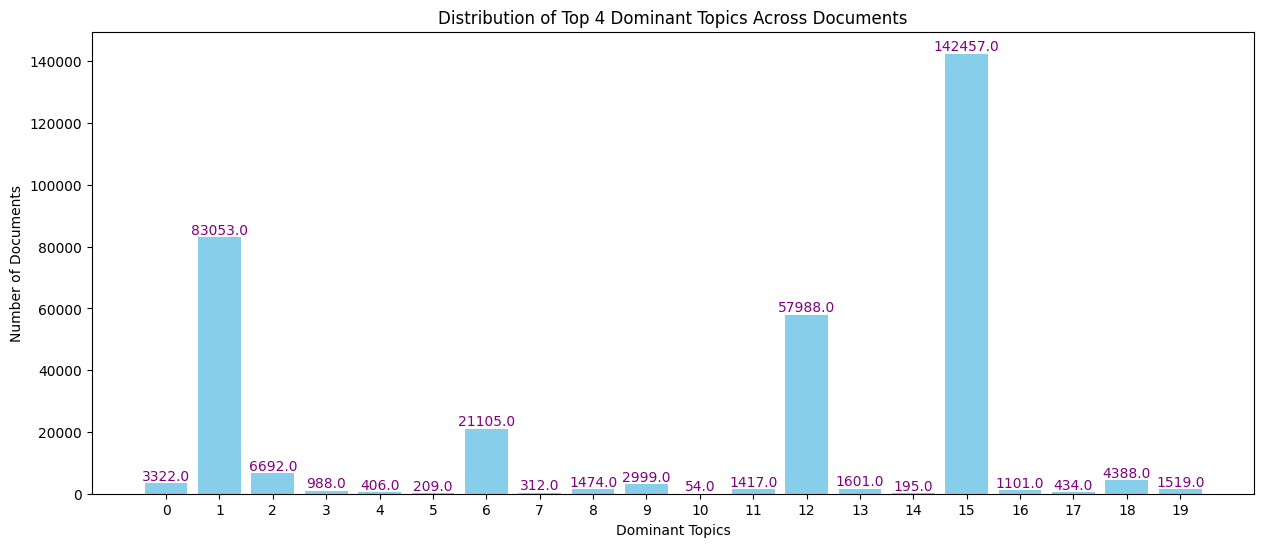

In [161]:
# Calculate the frequency of each dominant topic
topic_counts = np.zeros(20) 
n = 4  # Number of dominant topics per document
top_4_dominant_topics_chunked = [top_4_dominant_topics[i:i + n] for i in range(0, len(top_4_dominant_topics), n)]
for document_topics in top_4_dominant_topics_chunked:
    for topic in document_topics:
        if topic is not None:  # Exclude None values if present
            topic_counts[topic] += 1

# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(range(len(topic_counts)), topic_counts, color='skyblue')
plt.xlabel('Dominant Topics')
plt.ylabel('Number of Documents')
plt.title('Distribution of Top 4 Dominant Topics Across Documents')
plt.xticks(range(len(topic_counts))) 
for i, count in enumerate(topic_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom',color='purple')
plt.show()

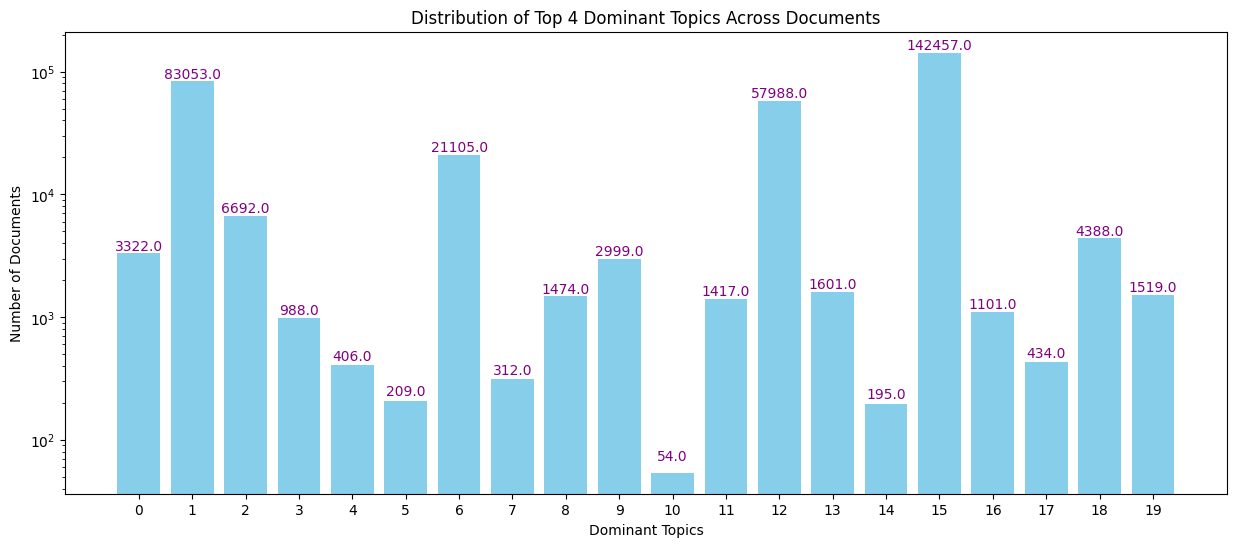

In [234]:
# Plotting the Top 4 Dominant Topics Across Documents bar chart with logarithmic scale for y-axis
plt.figure(figsize=(15, 6))
plt.bar(range(len(topic_counts)), topic_counts, color='skyblue')
plt.xlabel('Dominant Topics')
plt.ylabel('Number of Documents')
plt.title('Distribution of Top 4 Dominant Topics Across Documents')
plt.xticks(range(len(topic_counts))) 
plt.yscale('log') # Set y-axis scale to logarithmic
for i, count in enumerate(topic_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom',color='purple')
plt.show()

<p><b> <span style="color: orange"> 2. Select four popular topics in the corpus and draw a chart to show the popularity (trend) of the topics throughout the months of 2016 and 2017. </b></p>


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142570 entries, 0 to 142569
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           142570 non-null  int64         
 1   title        142568 non-null  object        
 2   publication  142570 non-null  object        
 3   author       126694 non-null  object        
 4   date         134982 non-null  datetime64[ns]
 5   year         139929 non-null  float64       
 6   month        139929 non-null  float64       
 7   url          85559 non-null   object        
 8   content      142570 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 9.8+ MB


In [175]:
df_dominant_topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142570 entries, 0 to 142569
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Dominant_Topic  142570 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


In [177]:
# Concat dominant topics to the text dataframe
combined_df = pd.concat([df, df_dominant_topics], axis=1)

In [178]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142570 entries, 0 to 142569
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              142570 non-null  int64         
 1   title           142568 non-null  object        
 2   publication     142570 non-null  object        
 3   author          126694 non-null  object        
 4   date            134982 non-null  datetime64[ns]
 5   year            139929 non-null  float64       
 6   month           139929 non-null  float64       
 7   url             85559 non-null   object        
 8   content         142570 non-null  object        
 9   Dominant_Topic  142570 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 10.9+ MB


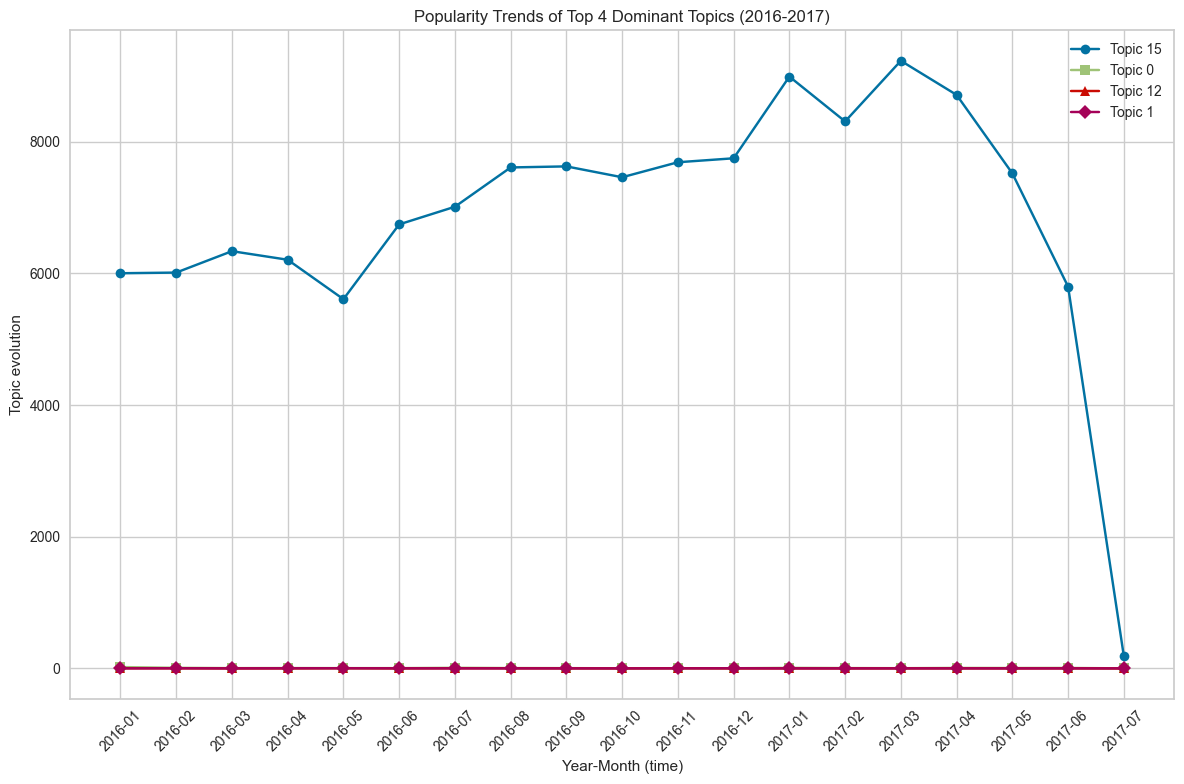

In [287]:
# Filter the combined dataframe for the years 2016 and 2017
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')  # Ensure 'date' column is in datetime format
combined_df['year_month'] = combined_df['date'].dt.to_period('M')
filtered_df = combined_df[combined_df['year'].isin([2016, 2017])]

# Group by year_month and Dominant_Topic, count occurrences, and unstack for plotting
grouped = filtered_df.groupby(['year_month', 'Dominant_Topic']).size().unstack().fillna(0)

# Select the top 4 most popular topics
top_4_topics = grouped.sum().nlargest(4).index

# Filter the grouped dataframe for the top 4 topics
grouped_top_4 = grouped[top_4_topics]

# Plot the popularity trends for each topic
plt.figure(figsize=(12, 8))
markers = ['o', 's', '^', 'D'] 

for i, (topic, marker) in enumerate(zip(grouped_top_4.columns, markers)):
    plt.plot(
        grouped_top_4.index.astype(str), 
        grouped_top_4[topic], 
        label=f'Topic {topic}', 
        marker=marker, 
    )

plt.xlabel('Year-Month (time)')
plt.ylabel('Topic evolution')
plt.title('Popularity Trends of Top 4 Dominant Topics (2016-2017)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

During the time from 2016 to 2017, topic 15 was also the most trending topic, so that the popularity of other topics compared to topic 15 was very small. In this case, we may utilize Logarithmic scales to display data with wide value disparities and better see the trending of the top four most popular topics.

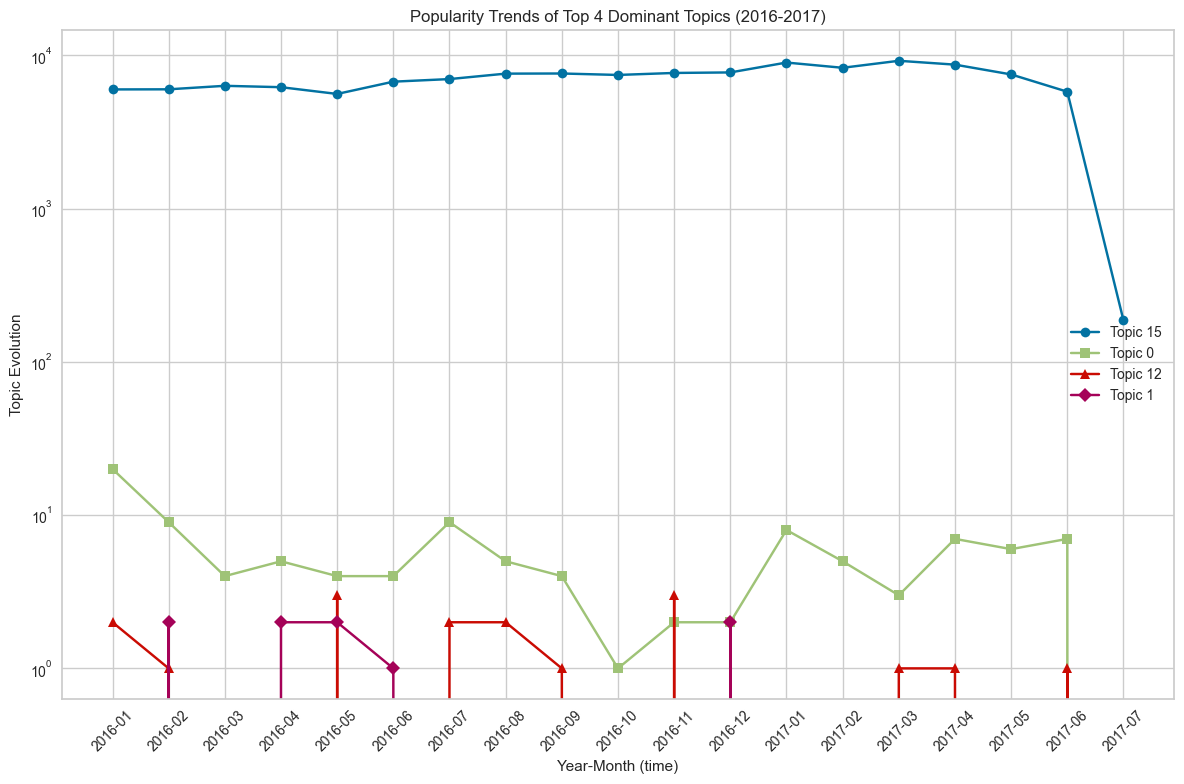

In [290]:
# Plot the popularity trends for each topic with logarithmic scale for y-axis
plt.figure(figsize=(12, 8))
markers = ['o', 's', '^', 'D'] 

for i, (topic, marker) in enumerate(zip(grouped_top_4.columns, markers)):
    plt.plot(
        grouped_top_4.index.astype(str), 
        grouped_top_4[topic], 
        label=f'Topic {topic}', 
        marker=marker, 
    )

plt.xlabel('Year-Month (time)')
plt.ylabel('Topic Evolution')
plt.title('Popularity Trends of Top 4 Dominant Topics (2016-2017)')
plt.legend()
plt.xticks(rotation=45)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.tight_layout()
plt.show()

<p><b> <span style="color: orange"> 3. Use Silhouette Scores or Elbow Curves to justify the number of topics in your project. Explain what would be best number of topics in this dataset and why. </b></p>

### Silhouette Scores

In [198]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Assuming num_topics range from 5 to 25
for num_topics in range(5, 26):
    topics_matrix = np.zeros((len(doc_topic_distributions), num_topics))

    # Fill in the matrix with topic proportions
    for i, doc in enumerate(doc_topic_distributions):
        for topic, proportion in doc:
            if topic < num_topics:
                topics_matrix[i][topic] = proportion

    # Compute silhouette scores
    silhouette_avg = silhouette_score(topics_matrix, np.argmax(topics_matrix, axis=1))   
    silhouette_scores.append(silhouette_avg)


In [200]:
import pickle
# Save the matrix with topic proportions using pickle
with open('topics_matrix.pkl', 'wb') as f:
    pickle.dump(topics_matrix, f)

In [201]:
import pickle
# Open the matrix with topic proportions using pickle
with open('topics_matrix.pkl', 'rb') as f:
    topics_matrix = pickle.load(f)

In [202]:
import pickle
# Save silhouette_scores using pickle
with open('silhouette_scores.pkl', 'wb') as f:
    pickle.dump(silhouette_scores, f)

In [203]:
import pickle
# Open the silhouette_scores using pickle
with open('silhouette_scores.pkl', 'rb') as f:
    silhouette_scores = pickle.load(f)

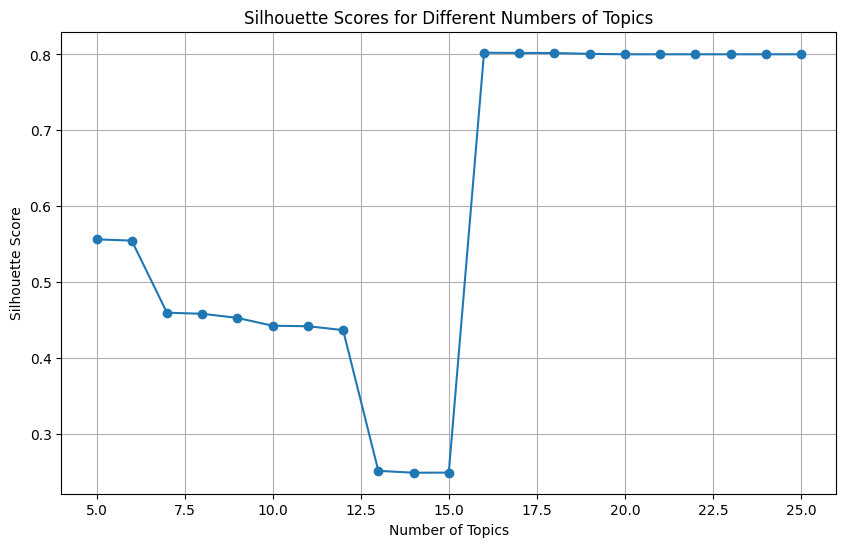

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(5, 26), silhouette_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Topics')
plt.grid(True)
plt.show()

In [ ]:
print(silhouette_scores)

[0.5563587715359115, 0.5546843132060997, 0.459715580007507, 0.4582607633232873, 0.4528477551681526, 0.44247512522621096, 0.44189334531597263, 0.4367586080109328, 0.25132200451315945, 0.24881530838836957, 0.2489758386010239, 0.802282736903772, 0.8020092393609203, 0.8018974500444341, 0.8007855258893697, 0.8002304270969195, 0.8002304270969195, 0.8002304270969195, 0.8002304270969195, 0.8002304270969195, 0.8002304270969195]


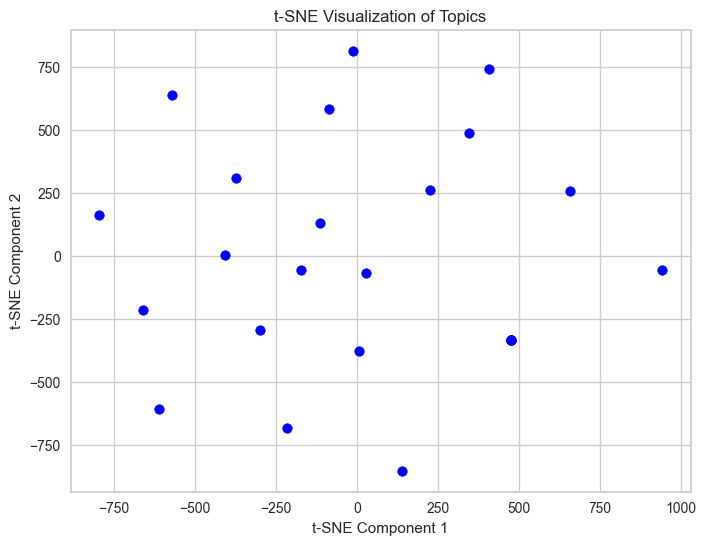

In [249]:
# from yellowbrick.text import TSNEVisualizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

svd = TruncatedSVD(n_components=20)  # Choose the number of components
topics_reduced = svd.fit_transform(topics_matrix.T)

# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Adjust perplexity here
topics_embedded = tsne.fit_transform(topics_reduced)

# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(topics_embedded[:, 0], topics_embedded[:, 1], marker='o', c='blue')
plt.title('t-SNE Visualization of Topics')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Elbow Curves 

In [220]:
print(gensim_dict)

Dictionary<277508 unique tokens: ['washington', 'congressional', 'republican', 'new', 'fear']...>


In [221]:
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import word_tokenize

coherence_scores = []
num_topics_list = range(5, 26)  # Vary the number of topics
tokenized_texts = cleaned_content.apply(word_tokenize)
# Convert the id2word dictionary to a Gensim Dictionary
token2id = gensim_dict.token2id

In [223]:
token2id

{'washington': 265851,
 'congressional': 49484,
 'republican': 204446,
 'new': 168584,
 'fear': 81023,
 'come': 48051,
 'health': 103329,
 'care': 37661,
 'lawsuit': 136809,
 'obama': 174070,
 'administration': 2910,
 'might': 156186,
 'win': 269448,
 'incoming': 113469,
 'trump': 251595,
 'could': 51865,
 'choose': 43566,
 'longer': 142085,
 'defend': 59110,
 'executive': 77769,
 'branch': 30955,
 'suit': 236237,
 'challenge': 40875,
 'authority': 16126,
 'spend': 230254,
 'billion': 25528,
 'dollar': 66044,
 'insurance': 115432,
 'subsidy': 235723,
 'american': 8393,
 'handing': 101199,
 'house': 108625,
 'big': 25218,
 'victory': 262188,
 'issue': 117581,
 'sudden': 235976,
 'loss': 142552,
 'disputed': 64829,
 'conceivably': 48925,
 'cause': 39239,
 'program': 194055,
 'implode': 112901,
 'leaving': 137294,
 'million': 156773,
 'people': 184676,
 'without': 270082,
 'access': 1620,
 'prepared': 192639,
 'replacement': 204129,
 'lead': 137070,
 'chaos': 41246,
 'market': 148788,
 's

In [224]:
id2word

{265851: 'washington',
 49484: 'congressional',
 204446: 'republican',
 168584: 'new',
 81023: 'fear',
 48051: 'come',
 103329: 'health',
 37661: 'care',
 136809: 'lawsuit',
 174070: 'obama',
 2910: 'administration',
 156186: 'might',
 269448: 'win',
 113469: 'incoming',
 251595: 'trump',
 51865: 'could',
 43566: 'choose',
 142085: 'longer',
 59110: 'defend',
 77769: 'executive',
 30955: 'branch',
 236237: 'suit',
 40875: 'challenge',
 16126: 'authority',
 230254: 'spend',
 25528: 'billion',
 66044: 'dollar',
 115432: 'insurance',
 235723: 'subsidy',
 8393: 'american',
 101199: 'handing',
 108625: 'house',
 25218: 'big',
 262188: 'victory',
 117581: 'issue',
 235976: 'sudden',
 142552: 'loss',
 64829: 'disputed',
 48925: 'conceivably',
 39239: 'cause',
 194055: 'program',
 112901: 'implode',
 137294: 'leaving',
 156773: 'million',
 184676: 'people',
 270082: 'without',
 1620: 'access',
 192639: 'prepared',
 204129: 'replacement',
 137070: 'lead',
 41246: 'chaos',
 148788: 'market',
 23

In [225]:
tokenized_texts

0         [washington, congressional, republican, new, f...
1         [bullet, shell, get, counted, blood, dry, voti...
2         [walt, disney, bambi, opened, critic, praised,...
3         [death, may, great, equalizer, necessarily, ev...
4         [seoul, south, korea, north, korea, leader, ki...
                                ...                        
142565    [uber, driver, keith, avila, picked, passenger...
142566    [crew, friday, continued, search, lake, erie, ...
142567    [obama, administration, announced, massive, ef...
142568    [story, updated, new, law, michigan, prohibit,...
142569    [nation, first, recreational, marijuana, shop,...
Name: content, Length: 142570, dtype: object

In [226]:
# Create a Gensim dictionary
dictionary = corpora.Dictionary(tokenized_texts)

In [228]:
print(dictionary)

Dictionary<277534 unique tokens: ['access', 'acknowledge', 'act', 'administration', 'advocate']...>


In [229]:
coherence_scores = []
num_topics_list = range(5, 26)  # Vary the number of topics

for num_topics in num_topics_list:
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)

In [230]:
import pickle
# Save Elbow Curves score using pickle
with open('coherence_scores.pkl', 'wb') as f:
    pickle.dump(coherence_scores, f)

In [231]:
import pickle
# Open Elbow Curves scores using pickle
with open('coherence_scores.pkl', 'rb') as f:
    coherence_scores = pickle.load(f)

In [240]:
print(coherence_scores)

[0.34421697062872086, 0.34817183660637463, 0.3123969659203949, 0.3456680704295714, 0.3170060584837435, 0.35424644822979884, 0.3678975874051133, 0.3393346708426332, 0.36566191289416233, 0.34174130062451563, 0.341711214230861, 0.35306400601328247, 0.3654700072501286, 0.3638432362404313, 0.3271398968933052, 0.3473276813206691, 0.3158504760351867, 0.32460515662287426, 0.33524297245986684, 0.2942939273132432, 0.3313168721869706]


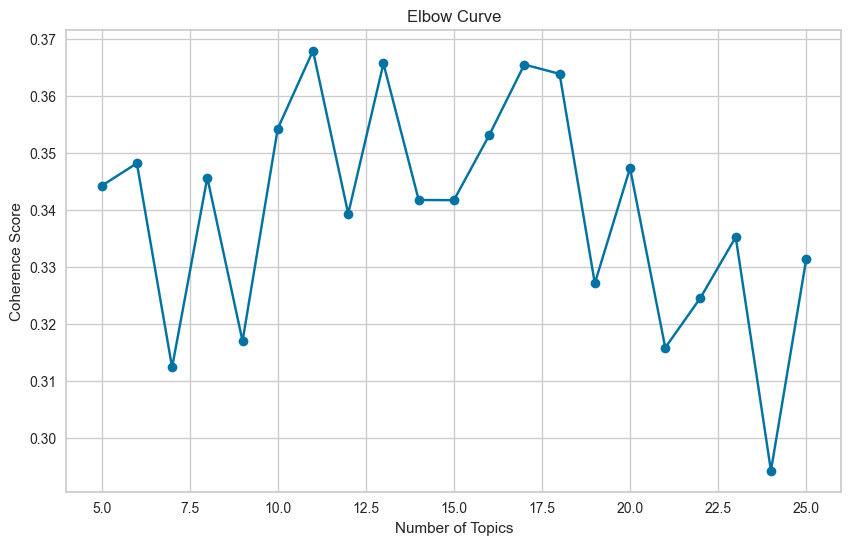

In [258]:
# Plotting coherence scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

In [261]:
# from sklearn.metrics import silhouette_score
silhouette_scores2 = []
# num_topics_list = range(5, 26) 
# dictionary = corpora.Dictionary(tokenized_texts)

for num_topics in num_topics_list:
    lda_model2 = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
    
    # Extract document-topic distributions
    doc_topic_distributions = lda_model2[corpus]
    
    # Topics_matrix represents the topics generated by the LDA model
    topics_matrix2 = np.zeros((len(doc_topic_distributions), num_topics))
    
    # Fill in the matrix with topic proportions
    for i, doc in enumerate(doc_topic_distributions):
        for topic, proportion in doc:
            if topic < num_topics:
                topics_matrix2[i][topic] = proportion
    
    # Calculate silhouette score
    silhouette_avg2 = silhouette_score(topics_matrix2, np.argmax(topics_matrix2, axis=1))
    silhouette_scores2.append(silhouette_avg2)

In [263]:
import pickle
# Save silhouette_scores using pickle
with open('silhouette_scores2.pkl', 'wb') as f:
    pickle.dump(silhouette_scores2, f)

In [264]:
import pickle
# Open the silhouette_scores using pickle
with open('silhouette_scores2.pkl', 'rb') as f:
    silhouette_scores2 = pickle.load(f)

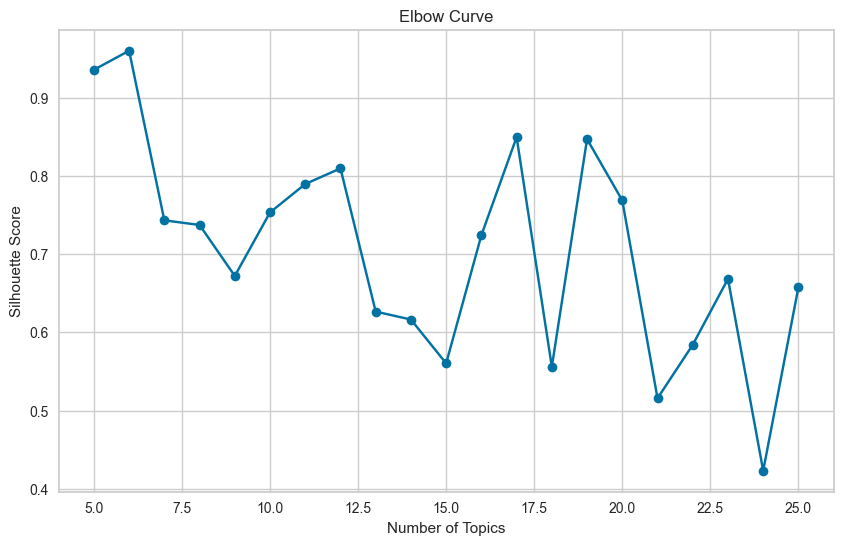

In [262]:
# Visualize silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, silhouette_scores2, marker='o', linestyle='-')
plt.xlabel('Number of Topics')
plt.ylabel('Silhouette Score')
plt.title('Elbow Curve')
plt.show()

The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). In the context of Latent Dirichlet Allocation (LDA) topic modeling:<br>
Higher Silhouette Score indicates that the topics are well-separated and the documents within each topic are more similar to each other than to documents in other topics. This suggests clearer and distinct topic boundaries.<br>
Lower Silhouette Score implies less distinct topics or overlapping themes between topics. It suggests that documents within a topic might not be very similar to each other or that the topics might not be clearly separated.<br>
Here, we suppose the topic range is from 5 to 26, and the Silhouette Score indicates higher scores (ranging from 0.44 to 0.80) within this range. THe score is quite low if we have more than 5 topics, that means those topics are similar. In the other hand, if the score and plot reveal that if we cluster 5 topics only, the Silhouette Score approaches 1. As a result, clusters are more defined and isolated. We can see this more clearly in the pyLDAvis visualisation, where the subjects from 1 to 5 are neatly separated, but the topics from 5 to later collapse together.